## **Index:**
- Please ensure R is installed on your machine and packages for Robyn have been installed
- [Import necessary python packages](#import-python-packages)
- Environment Setup:
    - [Setting up environment on WINDOWS machine](#Setting-up-environment-on-WINDOWS-machine)
    - [Setting up environment on LINUX machine](#Setting-up-environment-on-LINUX-machine)
    - [Setting up environment on MAC](#Setting-up-environment-on-MAC)
- Demo Script
    - Provision API
    - Get Data
    - Robyn Inputs
    - Robyn Run
    - Robyn Outputs

#### Import necessary python packages <a class="anchor" id="import-python-packages"></a>

In [1]:
import pandas as pd
import json
import requests
import json
import datetime as dt
import binascii
import io
import pandas as pd
import os
import sys
import subprocess

import pprint
from PIL import Image
Image.MAX_IMAGE_PIXELS = 2**30

#### Setting up environment on WINDOWS machine <a class="anchor" id="Setting-up-environment-on-WINDOWS-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! START "" /B "<path_where_R_is_installed>\Rscript.exe" "<path_where_robyn_api_files_exist>\api_call.R" </font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    e.g. ! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:\Documents\GitHub\robyn\robyn_api\api_call.R"

In [2]:
! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:/Users/ebyjose/OneDrive - Facebook/Documents/GitHub/robyn/robyn_api/api_call.R"

zsh:1: command not found: START


#### Steps to run RobynAPI if you are using a <u> LINUX </u> machine/server <a class="anchor" id="Setting-up-environment-on-LINUX-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! Rscript <path_where_robyn_api_files_exist>\api_call.R &</font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    
    e.g. # ! Rscript /home/robyn/robyn_api/api-call.R

In [ ]:
! Rscript <path_to_apifile>/api_call.R &

#### Steps to run RobynAPI if you are using a <u> MAC </u> <a class="anchor" id="Setting-up-environment-on-MAC"></a>

#### Barebones command to run RobynAPI -> <font color='red'> subprocess.Popen(["Rscript", "<path_to_apifile>/api_call.R"])</font>
1. Find where api files exist and replace it with <path_to_apifile>
    
    e.g. # subprocess.Popen(["Rscript", "/home/robyn/robyn_api/api_call.R"])

In [2]:
subprocess.Popen(["Rscript", "./api_call.R"])

<Popen: returncode: None args: ['Rscript', './api_call.R']>

Running plumber API at http://127.0.0.1:9999
Running swagger Docs at http://127.0.0.1:9999/__docs__/


## Demo file

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
# Change to your URL
apiBaseUrl = "http://127.0.0.1:9999/{}"
url = apiBaseUrl[:-3]+"/openapi.json"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
apis = json.loads(soup.contents[0])
apis['paths'].keys()

dict_keys(['/dt_simulated_weekly', '/dt_prophet_holidays', '/robyn_inputs', '/robyn_run', '/robyn_outputs', '/robyn_onepagers', '/robyn_allocator'])

In [4]:
# # apiBaseUrl = "http://127.0.0.1:9999/{}"

# apiBaseUrl = "http://127.0.0.1:9999/{}"


In [5]:
hexToPng = lambda fileName, hexData: Image.open(io.BytesIO(binascii.unhexlify(hexData))).save(fileName, "png")
dateConv = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').date()

In [6]:
def asSerialisedFeather(modelData):
    modelDataFeather = io.BytesIO()
    pd.DataFrame(modelData).to_feather(modelDataFeather)
    modelDataFeather.seek(0)
    modelDataBinary = modelDataFeather.read()
    return binascii.hexlify(modelDataBinary).decode()

# Get Data

In [7]:
# Get the sample dataset from Robyn api for use in later steps
response = requests.post(apiBaseUrl.format('dt_simulated_weekly'))
respJson = json.loads(response.content.decode('utf-8'))
dtSimulatedWeekly = [{'DATE' : dateConv(rec['DATE']),**{col:rec[col]for col in rec if col!='DATE'}} for rec in respJson]
dtSimulatedWeeklyDf = pd.DataFrame(dtSimulatedWeekly)

In [8]:
dtSimulatedWeeklyDf.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,67075.04,0.0,38185.4667,7.290385e+07,0.0000,0,8125009,22821.3987,na,19401.6538
1,2015-11-30,2.584277e+06,85840.36,0.0,0.0000,1.658110e+07,29511.7155,12400,7901549,3425.8574,na,14791.0000
2,2015-12-07,2.547387e+06,0.00,396835.2,1361.6000,4.995477e+07,36132.3590,11360,8300197,12769.1261,na,14544.0000
3,2015-12-14,2.875220e+06,250350.92,0.0,53040.0000,3.164930e+07,36804.2110,12760,8122883,8401.4720,na,2800.0000
4,2015-12-21,2.215953e+06,0.00,832008.0,0.0000,8.802269e+06,28401.7441,10840,7105985,2068.7478,na,15478.0000


In [9]:
# Get the sample dataset from Robyn api for use in later steps
response = requests.post(apiBaseUrl.format('dt_prophet_holidays'))
respJson = json.loads(response.content.decode('utf-8'))
dt_prophet_holidays = pd.DataFrame(respJson)
dt_prophet_holidays.head()

,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


# Robyn Input

In [10]:
inputArgs = {
    "InputCollect" : {
        "date_var": "DATE",
        "dep_var": "revenue",
        "dep_var_type": "revenue",
        "prophet_vars": ["trend", "season", "holiday"],
        "prophet_country": "DE",
        "context_vars" : ["competitor_sales_B", "events"],
        "paid_media_spends": ["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
        "paid_media_vars": ["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
        "organic_vars" : "newsletter",
        "window_start": "2016-01-01",
        "window_end": "2018-12-31",
        "adstock": "geometric",
        "hyperparameters": {
          "facebook_S_alphas" : [0.5, 3],
          "facebook_S_gammas" : [0.3, 1],
          "facebook_S_thetas" : [0, 0.3],
          "print_S_alphas" : [0.5, 3],
          "print_S_gammas" : [0.3, 1],
          "print_S_thetas" : [0.1, 0.4],
          "tv_S_alphas" : [0.5, 3],
          "tv_S_gammas" : [0.3, 1],
          "tv_S_thetas" : [0.3, 0.8],
          "search_S_alphas" : [0.5, 3],
          "search_S_gammas" : [0.3, 1],
          "search_S_thetas" : [0, 0.3],
          "ooh_S_alphas" : [0.5, 3],
          "ooh_S_gammas" : [0.3, 1],
          "ooh_S_thetas" : [0.1, 0.4],
          "newsletter_alphas" : [0.5, 3],
          "newsletter_gammas" : [0.3, 1],
          "newsletter_thetas" : [0.1, 0.4],
          "train_size": [0.5, 0.8]
        }
    },
    "OutputCollect": {
        "conv_msg": []
    }
}

In [11]:
# Build the payload for the robyn run
payload = {
    'modelData' : asSerialisedFeather(dtSimulatedWeeklyDf), 
    'holidayData' : asSerialisedFeather(dt_prophet_holidays), 
    'jsonInput' : json.dumps(inputArgs)
}

In [12]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

Automatically set these variables as 'factor_vars': 'events'
Input 'window_start' is adapted to the closest date contained in input data: 2016-01-04
>> Running feature engineering...


In [13]:
# MB
sys.getsizeof(response.content.decode('utf-8')) / 1e+6

10.617267

In [14]:
len(respJson)

41

In [15]:
InputCollect.keys()

dict_keys(['dt_input', 'dt_holidays', 'dt_mod', 'dt_modRollWind', 'xDecompAggPrev', 'date_var', 'dayInterval', 'intervalType', 'dep_var', 'dep_var_type', 'prophet_vars', 'prophet_signs', 'prophet_country', 'context_vars', 'context_signs', 'paid_media_vars', 'paid_media_signs', 'paid_media_spends', 'paid_media_total', 'mediaVarCount', 'exposure_vars', 'organic_vars', 'organic_signs', 'all_media', 'all_ind_vars', 'factor_vars', 'unused_vars', 'window_start', 'rollingWindowStartWhich', 'window_end', 'rollingWindowEndWhich', 'rollingWindowLength', 'totalObservations', 'refreshAddedStart', 'adstock', 'hyperparameters', 'calibration_input', 'custom_params', 'dt_inputRollWind', 'modNLS', 'version'])

# Robyn Run

In [16]:
runArgs = {
    "iterations" : 500,
    "trials" : 1, 
    "ts_validation" : True,
    "add_penalty_factor" : False,
    "seed" : 123
}

In [17]:
# Build the payload for the robyn run
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonRunArgs' : json.dumps(runArgs)
}

In [18]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_run'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputModels = respJson

Warning in check_iteration(InputCollect$calibration_input, iterations, trials,  :
  We recommend to run at least 2000 iterations per trial and 5 trials to build initial model
Input data has 208 weeks in total: 2015-11-23 to 2019-11-11
Initial model is built on rolling window of 157 week: 2016-01-04 to 2018-12-31
Time-series validation with train_size range of 50%-80% of the data...
Using geometric adstocking with 20 hyperparameters (20 to iterate + 0 fixed) on 9 cores
>>> Starting 1 trials with 500 iterations each using TwoPointsDE nevergrad algorithm...
  Running trial 1 of 1


  |===================================================================== |  99%
  Finished in 0.28 mins


- DECOMP.RSSD NOT converged: sd@qt.20 0.066 > 0.053 & |med@qt.20| 0.57 <= 0.63
- NRMSE NOT converged: sd@qt.20 0.076 > 0.065 & |med@qt.20| 0.21 > 0.14
Total run time: 0.34 mins
Picking joint bandwidth of 0.0291
Picking joint bandwidth of 0.0212


In [19]:
respJson.keys()

dict_keys(['trial1', 'train_timestamp', 'cores', 'iterations', 'trials', 'intercept', 'intercept_sign', 'nevergrad_algo', 'ts_validation', 'add_penalty_factor', 'hyper_updated', 'hyper_fixed', 'convergence', 'ts_validation_plot', 'seed'])

# Robyn Outputs

In [20]:
create_files = False
robyn_directory = '~/Desktop'

In [21]:
outputsArgs = {
    "pareto_fronts" : 'auto', # automatically pick how many pareto-fronts to fill min_candidates (100)
#     "min_candidates" : 100, # top pareto models for clustering. Default to 100
    "calibration_constraint" : 0.1, # range c(0.01, 0.1) & default at 0.1
    "csv_out" : "pareto", # "pareto", "all", or NULL (for none)
    "clusters" : True, # Set to TRUE to cluster similar models by ROAS. See ?robyn_clusters
    "export" : create_files, # this will create files locally
    "plot_folder" : robyn_directory, # path for plots exports and files creation
#     "plot_pareto" : create_files # Set to FALSE to deactivate plotting and saving model one-pagers
}

In [22]:
# Build the payload for the robyn_outputs()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputModels' : json.dumps(OutputModels),
    'jsonOutputsArgs' : json.dumps(outputsArgs)
}

In [23]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_outputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputCollect = respJson

>>> Running Pareto calculations for 500 models on auto fronts...
>> Automatically selected 6 Pareto-fronts to contain at least 100 pareto-optimal models (108)
>>> Calculating response curves for all models' media variables (540)...
>> Pareto-Front: 1 [21 models]


 00:00:02 [=========================================] 100% | 21                      


>> Pareto-Front: 2 [17 models]


 00:00:01 [=========================================] 100% | 17                      
 00:00:00 [==                                       ] 4.76% | 1                      

>> Pareto-Front: 3 [21 models]


 00:00:02 [=========================================] 100% | 21                      
 00:00:00 [===                                      ] 6.67% | 1                      

>> Pareto-Front: 4 [15 models]


 00:00:01 [=========================================] 100% | 15                      


>> Pareto-Front: 5 [15 models]


 00:00:01 [=========================================] 100% | 15                      
 00:00:00 [=====                                    ] 10.5% | 2                      

>> Pareto-Front: 6 [19 models]


 00:00:02 [=========================================] 100% | 19                      


>>> Calculating clusters for model selection using Pareto fronts...
>> Auto selected k = 5 (clusters) based on minimum WSS variance of 5%
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TR

In [24]:
OutputCollect.keys()

dict_keys(['resultHypParam', 'xDecompAgg', 'mediaVecCollect', 'xDecompVecCollect', 'resultCalibration', 'allSolutions', 'allPareto', 'calibration_constraint', 'OutputModels', 'cores', 'iterations', 'trials', 'intercept_sign', 'nevergrad_algo', 'add_penalty_factor', 'seed', 'UI', 'pareto_fronts', 'hyper_fixed', 'plot_folder', 'clusters', 'hyper_updated'])

In [25]:
sys.getsizeof(response.content.decode('utf-8')) / 1e+6

81.984632

In [26]:
OutputCollect.keys()

dict_keys(['resultHypParam', 'xDecompAgg', 'mediaVecCollect', 'xDecompVecCollect', 'resultCalibration', 'allSolutions', 'allPareto', 'calibration_constraint', 'OutputModels', 'cores', 'iterations', 'trials', 'intercept_sign', 'nevergrad_algo', 'add_penalty_factor', 'seed', 'UI', 'pareto_fronts', 'hyper_fixed', 'plot_folder', 'clusters', 'hyper_updated'])

# Robyn Onepager

In [27]:
pd.DataFrame(OutputCollect['clusters']['models']).T

,0,1,2,3,4
cluster,1,2,3,4,5
rank,1,1,1,1,1
solID,1_38_3,1_48_3,1_41_4,1_26_2,1_49_1
mape,0,0,0,0,0
decomp.rssd,0.5047,0.5163,0.46,0.5528,0.5316
nrmse,0.2018,0.1642,0.2138,0.1575,0.1859
nrmse_test,0.1132,0.1172,0.2224,0.1149,0.1355
nrmse_train,0.1207,0.1206,0.1884,0.0994,0.1293
facebook_S_thetas,0.5165,0.4627,0.0011,0.646,0.4662
newsletter_thetas,0.6148,1.0,0.4443,0.4162,0.4185


In [28]:
for i in OutputCollect['clusters']['models']:
    print(i['solID'])

1_38_3
1_48_3
1_41_4
1_26_2
1_49_1


In [29]:
select_model = '1_48_3'

In [30]:
onepagersArgs = {
    "select_model" : select_model, # automatically pick how many pareto-fronts to fill min_candidates (100)
    "export" : False, # this will create files locally
}

'{"select_model": "1_48_3", "export": false}'

In [38]:
# Build the payload for the robyn_onepagers()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonOnepagersArgs": json.dumps(onepagersArgs),
    'dpi' : 300,
    'width' : 15,
    'height' : 20
}

In [39]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_onepagers'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
onepager = respJson

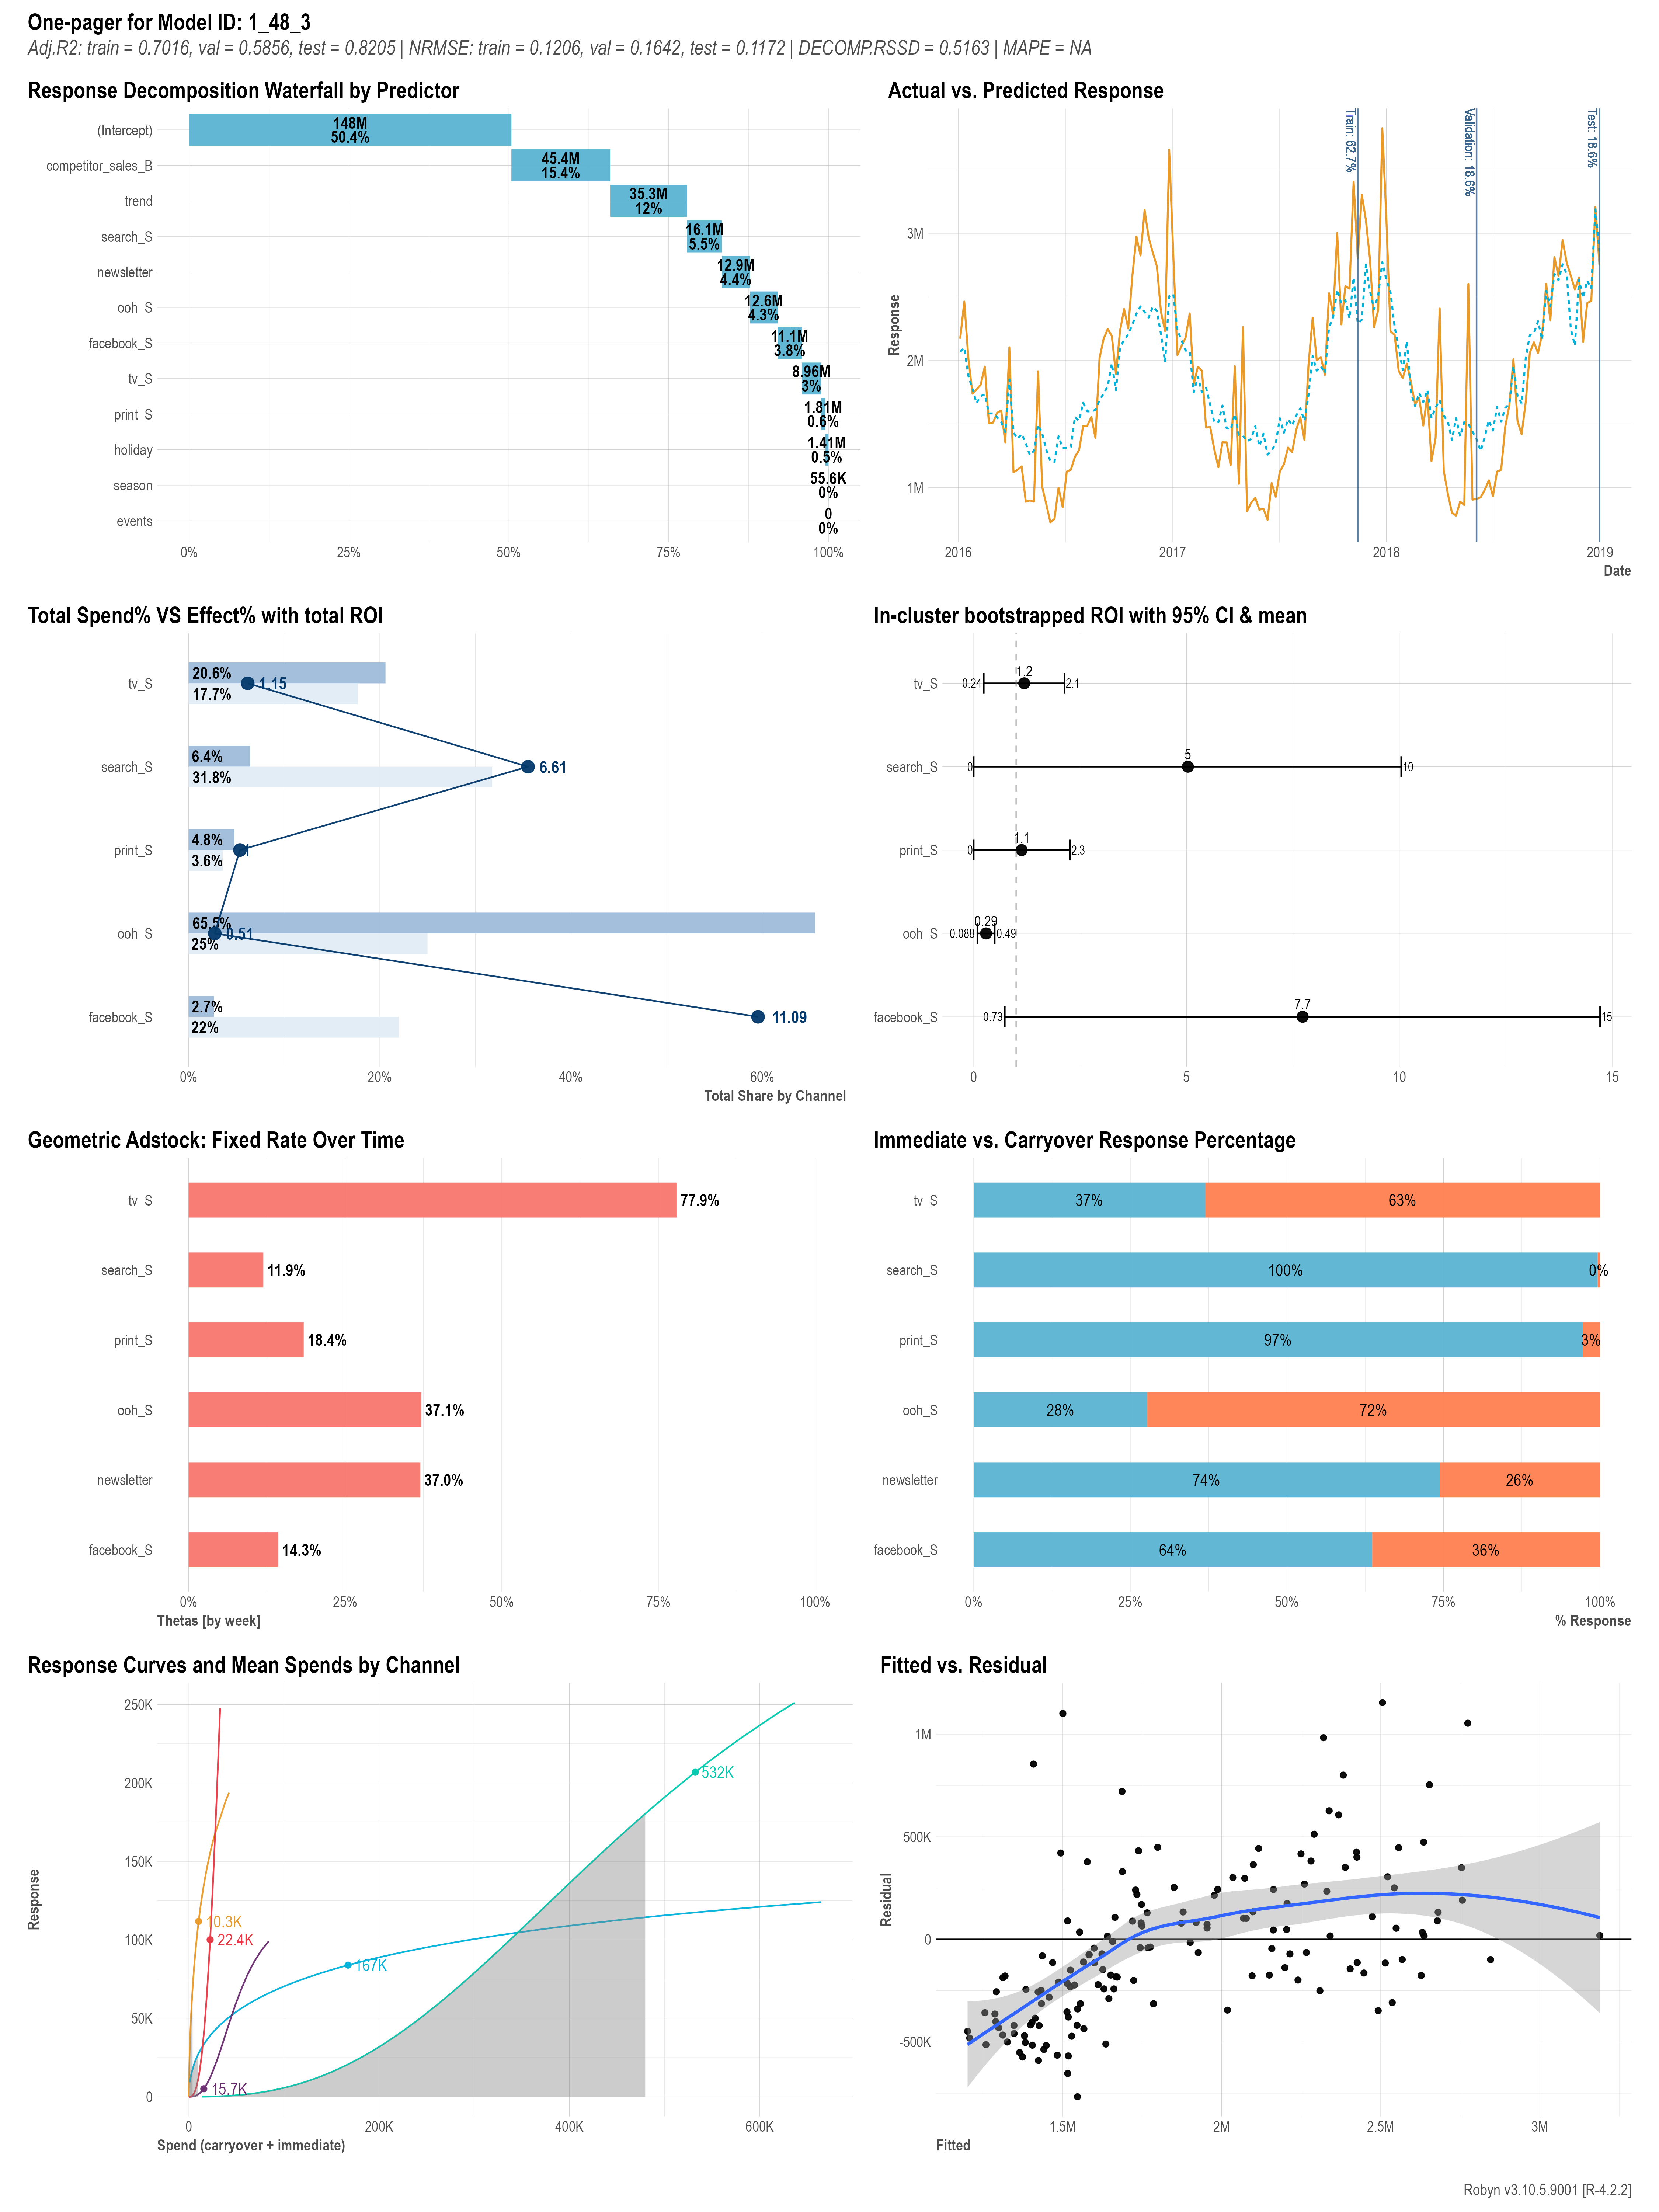

In [40]:
Image.open(io.BytesIO(binascii.unhexlify(onepager[select_model][0])))

# Robyn Allocator

In [37]:
# Build the payload for the robyn_allocator()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    'select_model' : select_model,
    'dpi' : 300,
    'width' : 15,
    'height' : 15
}

In [35]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_allocator'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
allocator = respJson

>>> Running budget allocator for model ID 1_48_3 ...
Automatically picked date_range = 'last_4'
Date Window: 2018-12-10:2018-12-31 (4 weeks)


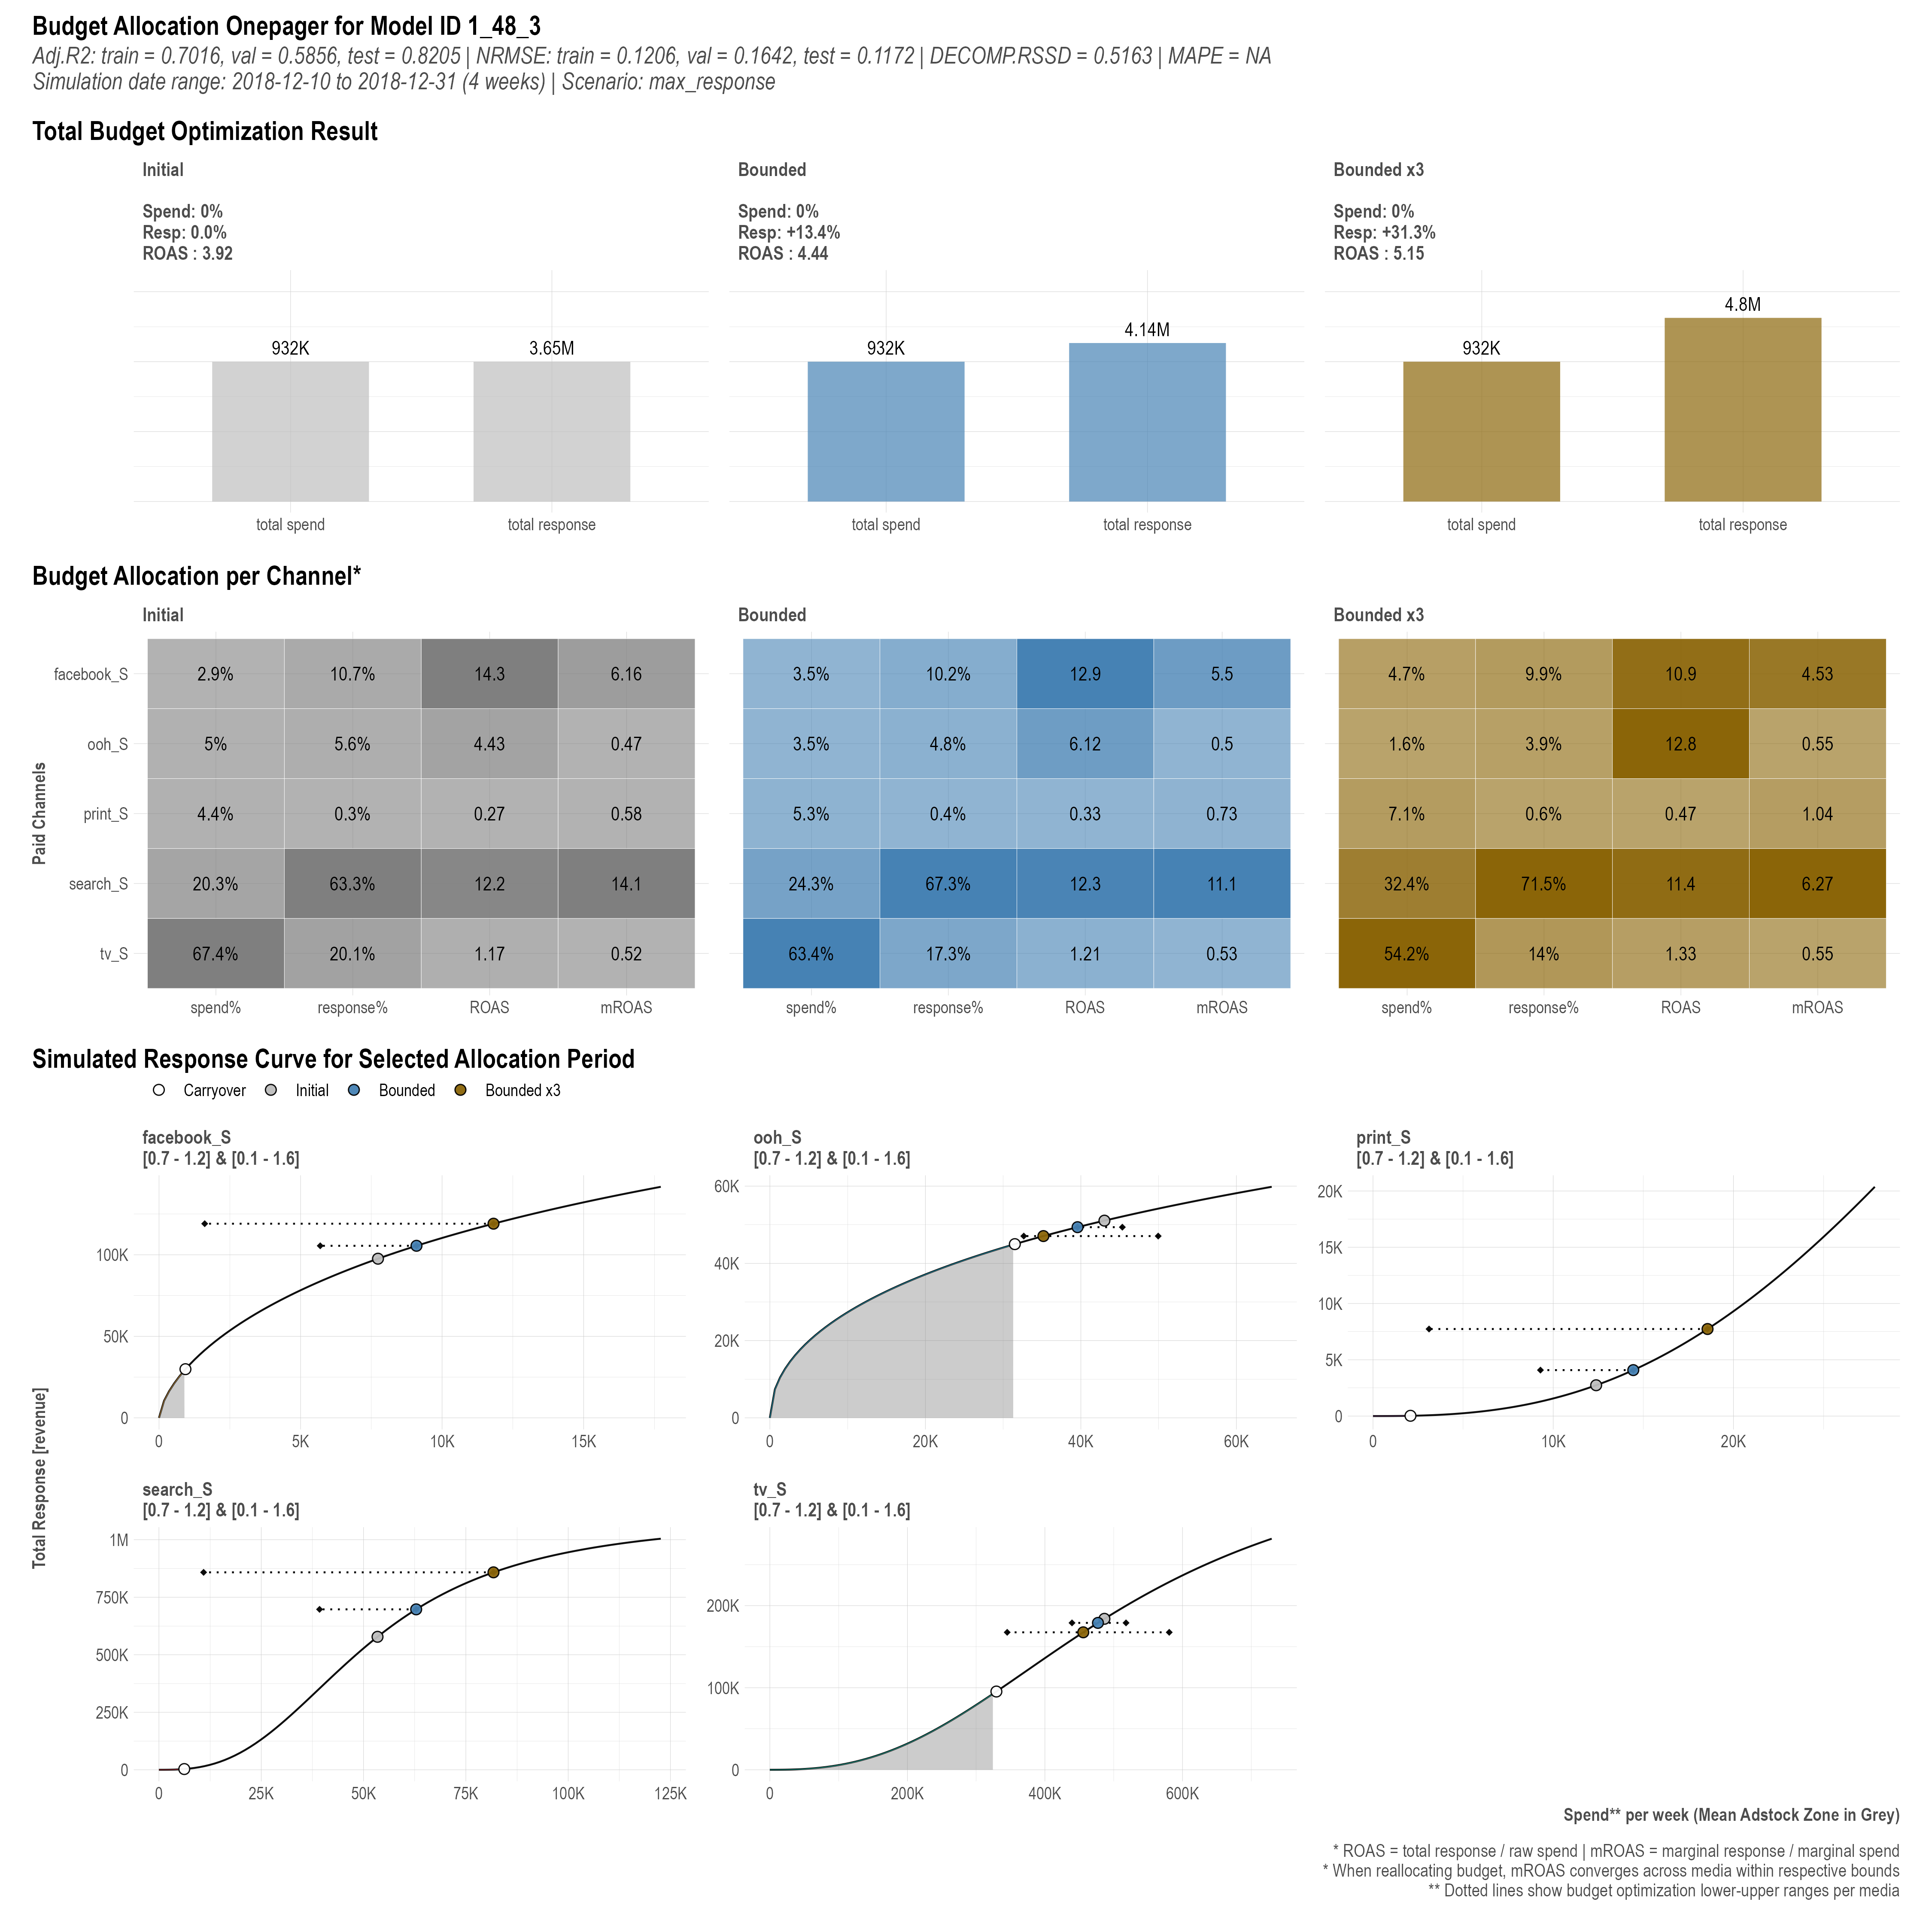

In [36]:
Image.open(io.BytesIO(binascii.unhexlify("".join(allocator))))